In [1]:
seed=0
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from pandasql import sqldf
from sklearn.preprocessing import scale
from pandas import DataFrame

In [2]:
df = pd.read_csv(r'winequality-red.csv')
df.shape

(1599, 12)

In [3]:
def plot_vars (x,y):

    sns.barplot(data=df, x=x, y=y)

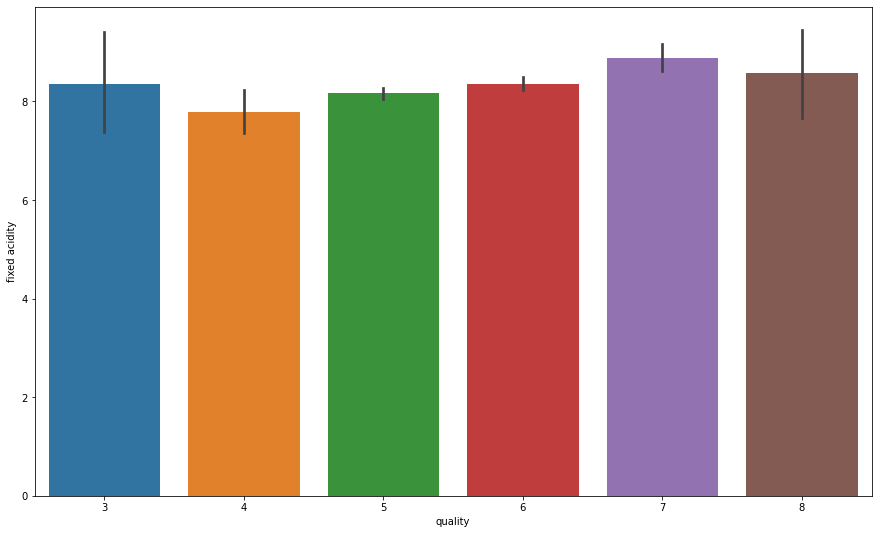

In [4]:
plt.figure(figsize = (15, 9))
plot_vars ('quality','fixed acidity')

In [5]:
df_n = DataFrame(scale(df), index=df.index, columns=df.columns)

In [6]:
list(df_n.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [7]:
y=df_n[['quality']]
X=df_n[['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']]

In [8]:
# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) #teste

In [9]:
# transpose
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [11]:
# arquitetura da rede
def getLayerSize (X,y,hidden_neurons):
    global n_x,n_h,n_y, size
    n_x = X.shape[0]
    n_h=hidden_neurons
    n_y=y.shape[0]
    size = {
    "n_x": n_x,
    "n_h": n_h,
    "n_y": n_y,
    }
    return n_x,n_h,n_y, size


def initializeParameters (X,layer_size):
    global W1,W2,params
    W1 = np.random.rand(n_h, n_x) * 0.01
    W2 = np.random.rand(n_y, n_h) * 0.01
    params = {
    "W1": W1,
    "W2": W2,
    }
    return W1,W2


#funcao de ativacao

def sigmoid (x):
    return 1/(1 + np.exp(-x))



#foward propagation

def forwardPropagation (X,params,layer_size):
    global Z1,A1,Z2,A2,cache
    Z1=np.dot(W1,X)
    A1=sigmoid(Z1)
    Z2=np.dot(W2,A1)
    A2=sigmoid(Z2)
    cache = {
    "Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2,
    }
    return Z1,A1,Z2,A2,cache


# funcao de custo 
def computeCost(y,fwp_prop):
    global cost
    m = y.shape[1]
    cost = np.sum((y - A2) ** 2) / m
    return cost

# backpropagation

def backwardPropagation (X,y,forwardPropagation,params,layer_size):
    global dZ2, dW2, dZ1, dW1, grads
    m1 = X.shape[1]
    dZ2 = A2 - y
    dW2 = (1 / m1) * np.dot(dZ2, A1.T)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m1) * np.dot(dZ1, X.T)
    grads = {
    "dW1": dW1,
    "dW2": dW2
    }
    return dZ2, dW2, dZ1, dW1, grads



# alterar os pesos
def updateParameters (grads,params,learning_rate):

    global W1,W2,update_params
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2

    update_params = {
    "W1": W1,
    "W2": W2
    }
    return W1, W2,


# treino
cost_history=[]
def trainModel (X,y,num_iteration,hidden_neurons,lr):
    global model_out
    layer_size = getLayerSize(X,y,hidden_neurons)
    init_params=initializeParameters (X,layer_size)


    for i in range(num_iteration):
        fwd_prop=forwardPropagation (X,init_params,layer_size)
        cost=computeCost(y,fwd_prop)
        back_prop=backwardPropagation (X,y,fwd_prop,init_params,layer_size)
        update_params=updateParameters (back_prop,init_params,learning_rate=lr)
        init_params+=update_params
        cost_history.append(cost)

# model_out = {
#         "updated_params": update_params,
#         "cost_hist": cost_history
# }




In [12]:
EPOCHS = 10000
HIDDEN_NEURONS = 40 #hidden layer
LEARNING_RATE = 0.01

train_model = trainModel(X_train, y_train, num_iteration=EPOCHS, hidden_neurons=HIDDEN_NEURONS, lr=LEARNING_RATE)
# X_train, X_test, y_train, y_test

In [124]:
layer_size = getLayerSize(X_test,y_test,HIDDEN_NEURONS)
params=update_params
fwd_prop=forwardPropagation (X_test,params,layer_size)
y_pred=A2

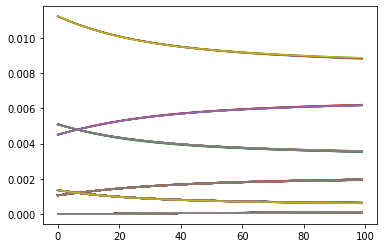

In [128]:
plt.plot(cost_history)
plt.show()

In [155]:
compare = np.vstack((y_pred, y_test))

In [157]:

ypred1 = pd.DataFrame(compare.transpose(), columns = ['pred','r'])

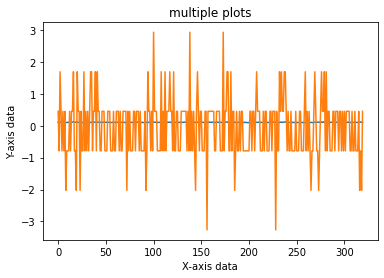

In [160]:
x = list(range(0, 320))

plt.plot(x, ypred1.pred)
plt.plot(x, ypred1.r)

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

## Other way

In [161]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [ ]:
# X_train, X_test, y_train, y_test

In [174]:
input_vectors = X_test

# Target
targets = y_train


# Parametros
learning_rate = 0.1

# Treina rede
neural_network = NeuralNetwork(learning_rate)
training_error = neural_network.train(input_vectors, targets, 10000)

# Visualiza resultados
plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")

KeyError: 9